In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip -q install healpy

     |████████████████████████████████| 23.6 MB 1.5 MB/s 


In [4]:
import numpy as np
import healpy as hp
import pylab as plt

In [ ]:
!wget -O febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits"

--2022-03-14 04:52:16--  http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [image/fits]
Saving to: ‘febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits’

febecop_ffp10_lense     [                <=> ] 576.01M  25.6MB/s    in 25s     

2022-03-14 04:52:42 (22.8 MB/s) - ‘febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits’ saved [603990720]



In [ ]:
path = "febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits"
gauss_map = hp.read_map(path,nest=1)

In [ ]:
gauss_map -= np.mean(gauss_map)
gauss_map /= np.std(gauss_map)

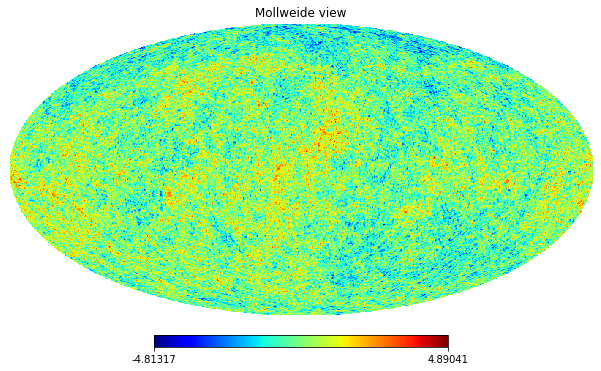

In [ ]:
cmapp = plt.cm.get_cmap('jet')
hp.mollview(gauss_map,nest=1,cmap=cmapp)

In [ ]:
def powering(m,lmax=None):
    if lmax is None:
        lmax = int(2*np.sqrt(m.size/12))
    m_ring = hp.reorder(m,n2r=1)
    cl = hp.anafast(m_ring, lmax=lmax)
    ll = np.arange(lmax+1)
    return ll,cl
ll_gauss,cl_gauss = powering(gauss_map,lmax=2500)

In [ ]:
!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt

In [18]:
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')

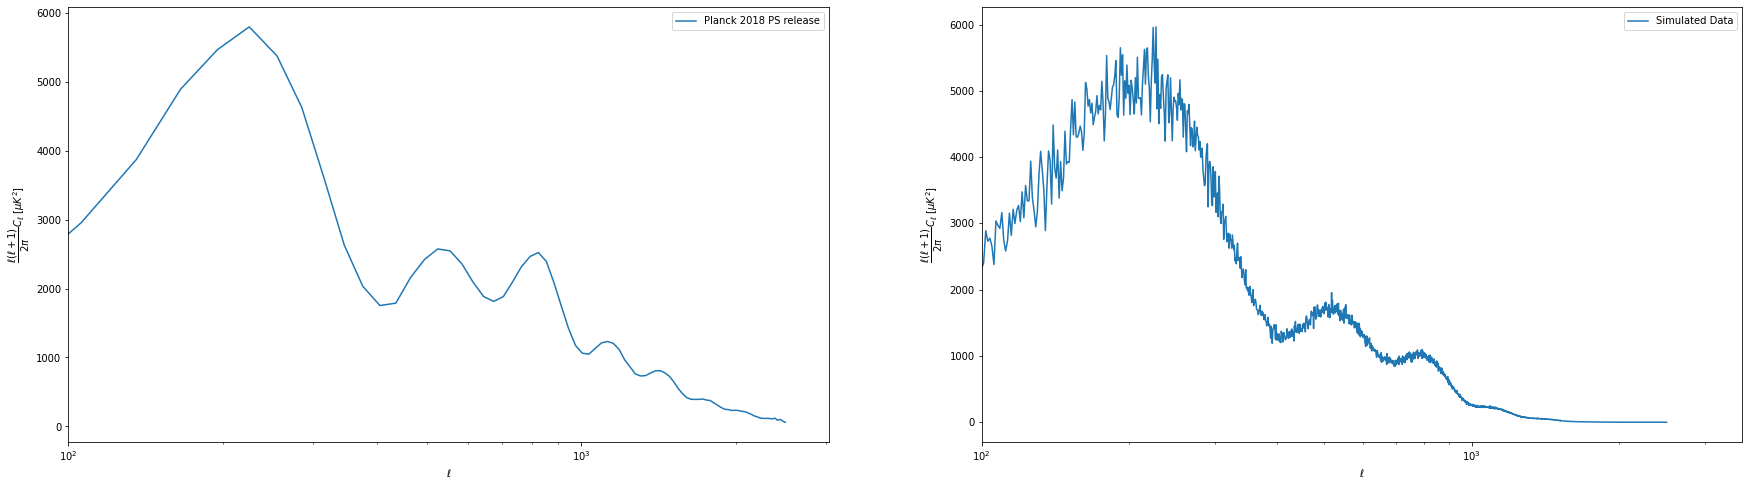

In [ ]:
plt.figure(figsize = (30, 8))
D_l = cl_gauss[2:] * ll_gauss[2:] * (ll_gauss[2:]+1)

plt.subplot(1, 2, 1)
plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], label='Planck 2018 PS release')
plt.xscale('log')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.xlim(1e2)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ll_gauss[2:],D_l*1720, label = 'Simulated Data')
plt.xscale('log')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.xlim(1e2)
plt.legend();

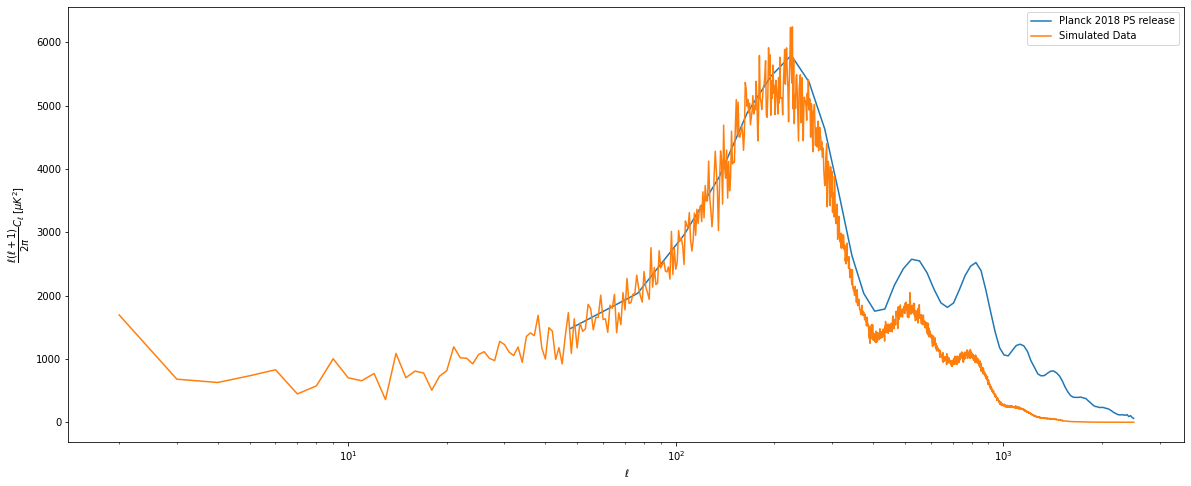

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], label='Planck 2018 PS release')
plt.plot(ll_gauss[2:],D_l*1800, label = 'Simulated Data')
plt.xscale('log')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.legend();

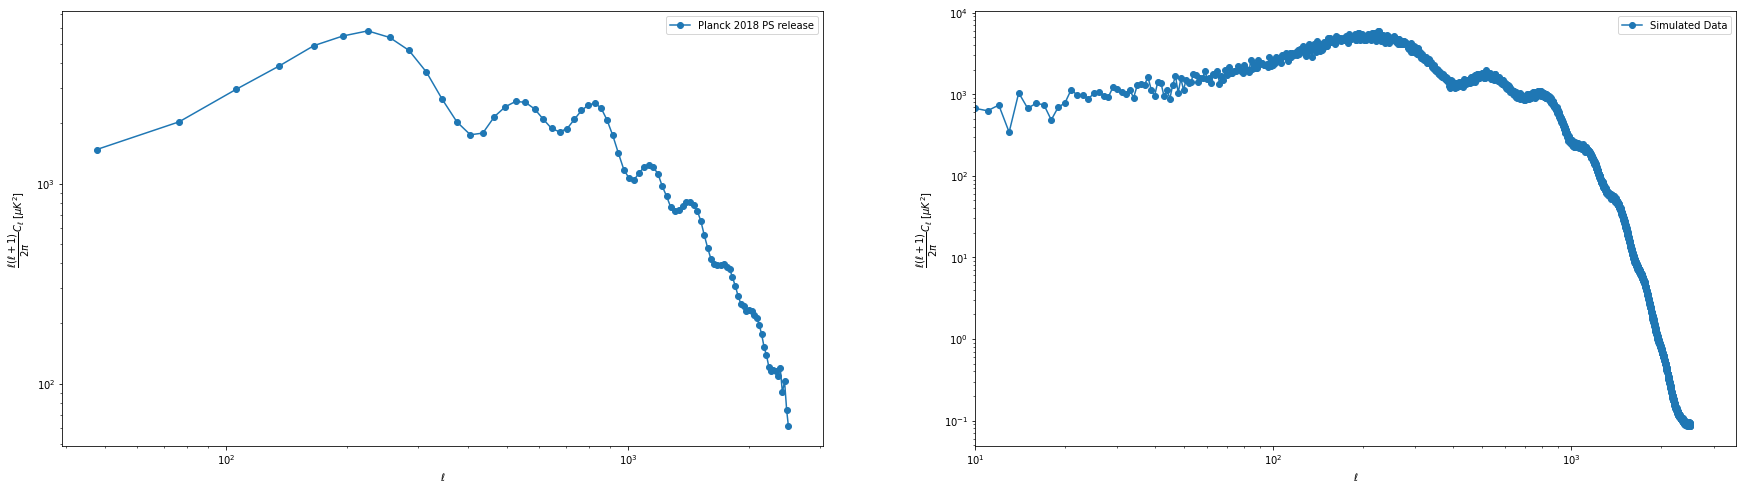

In [ ]:
plt.figure(figsize = (30, 8))
D_l = cl_gauss[2:] * ll_gauss[2:] * (ll_gauss[2:]+1)

plt.subplot(1, 2, 1)
plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1],"-o", label='Planck 2018 PS release')
plt.xscale('log')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ll_gauss[2:],D_l*1720,"-o", label = 'Simulated Data')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.xlim(1e1)
plt.legend();

In [ ]:
map = '/content/drive/MyDrive/CMB/map1n_allz_rtaapixlw_2048_1.fits'
string_map = hp.read_map(map,nest=1,verbose=0)

In [ ]:
string_map -= np.mean(string_map)
string_map /= np.std(string_map)

In [12]:
def powering(m,lmax=None):
    if lmax is None:
        lmax = int(2*np.sqrt(m.size/12))
    m_ring = hp.reorder(m,n2r=1)
    cl_str = hp.anafast(m_ring, lmax=lmax)
    ll_str = np.arange(lmax+1)
    return ll_str,cl_str
#ll_string,cl_string = powering(string_map,lmax=2500)

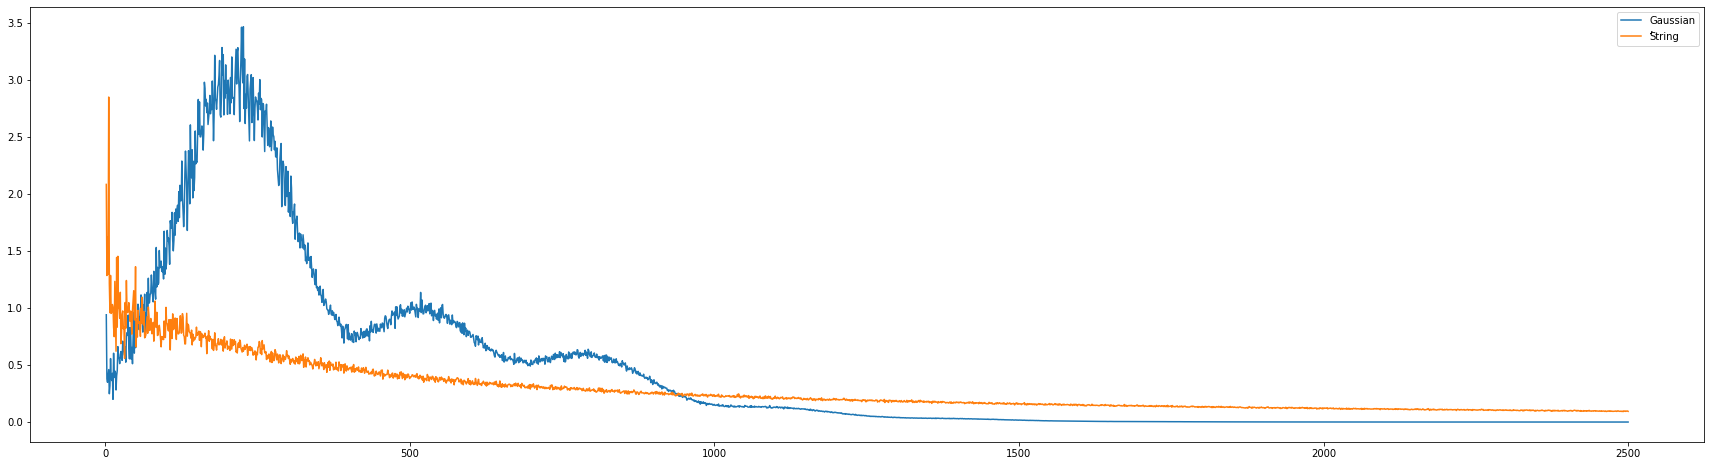

In [ ]:
plt.figure(figsize = (30, 8))
D_l_str = cl_string[2:] * ll_string[2:] * (ll_string[2:]+1)

plt.plot(ll_gauss[2:],D_l, label = 'Gaussian')
plt.plot(ll_string[2:],D_l_str, label = 'ُString')

plt.legend();

In [5]:
!wget -O febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits"
!wget -O febecop_ffp10_lensed_scl_cmb_100_mc_0001.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0001.fits"
!wget -O febecop_ffp10_lensed_scl_cmb_100_mc_0002.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0002.fits"
!wget -O febecop_ffp10_lensed_scl_cmb_100_mc_0003.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0003.fits"
!wget -O febecop_ffp10_lensed_scl_cmb_100_mc_0004.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0004.fits"

--2022-03-14 22:06:27--  http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [image/fits]
Saving to: ‘febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits’

febecop_ffp10_lense     [    <=>             ] 576.01M  19.5MB/s    in 38s     

2022-03-14 22:07:06 (15.4 MB/s) - ‘febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits’ saved [603990720]

--2022-03-14 22:07:06--  http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0001.fits
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [image/fits]
Saving to: ‘febecop_ffp1

In [6]:
g0 = hp.read_map("/content/febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits",nest=1)
g1 = hp.read_map("/content/febecop_ffp10_lensed_scl_cmb_100_mc_0001.fits",nest=1)
g2 = hp.read_map("/content/febecop_ffp10_lensed_scl_cmb_100_mc_0002.fits",nest=1)
g3 = hp.read_map("/content/febecop_ffp10_lensed_scl_cmb_100_mc_0003.fits",nest=1)
g4 = hp.read_map("/content/febecop_ffp10_lensed_scl_cmb_100_mc_0004.fits",nest=1)

In [7]:
s0 = hp.read_map("/content/drive/MyDrive/CMB/map1n_allz_rtaapixlw_2048_1.fits",nest=1)
s1 = hp.read_map("/content/drive/MyDrive/CMB/map1n_allz_rtaapixlw_2048_2.fits",nest=1)
s2 = hp.read_map("/content/drive/MyDrive/CMB/map1n_allz_rtaapixlw_2048_3.fits",nest=1)

In [9]:
g_mean = (g0 + g1 + g2 + g3 + g4) / 5

In [10]:
s_mean = (s0 + s1 + s2) / 3

In [11]:
g_mean -= np.mean(g_mean)
g_mean /= np.std(g_mean)

s_mean -= np.mean(s_mean)
s_mean /= np.std(s_mean)

In [13]:
g_mu = 1e-6
cmb_last = g_mean + ( g_mu * s_mean)

In [14]:
ll_gauss, cl_gauss = powering(g_mean, lmax = 2500)

In [ ]:
ll_s, cl_s = powering(s_mean, lmax = 2500)

In [15]:
ll_cmb, cl_cmb = powering(cmb_last, lmax = 2500)

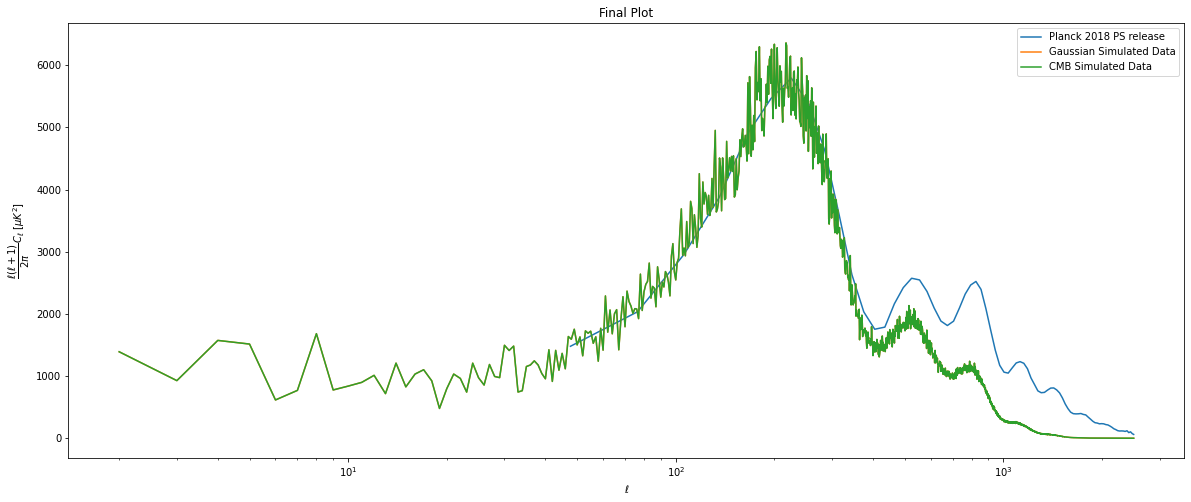

In [29]:
plt.figure(figsize = (20, 8))
D_l_gauss = cl_gauss[2:] * ll_gauss[2:] * (ll_gauss[2:]+1)
D_l_cmb = cl_cmb[2:] * ll_cmb[2:] * (ll_cmb[2:]+1)

plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], label='Planck 2018 PS release')
#plt.plot(ll_gauss[2:],D_l_gauss*2000, label = 'Gaussian Simulated Data')
plt.plot(ll_gauss[2:],D_l_cmb*2000, label = 'CMB Simulated Data')
plt.xscale('log')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.xlabel("$\ell$")
plt.title("SMICA vs CMB Simulated Data Comparison")
plt.legend();

In [26]:
max(D_l_cmb - D_l_gauss)

7.800347149311548e-07

In [25]:
min(D_l_cmb - D_l_gauss)

-1.0230804335931154e-06